<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Exercise_Fuzzy_AI_Adaptive_Neural_Fuzzy_20146195_Doan_Nguyen_Hoang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=487235b5be7498dc285e4f67301169d14b0b398fb8ab6467ea081806eb908ff2
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-25-0bc46d92f5c9>:72: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
<ipython-input-25-0bc46d92f5c9>:73: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
<ipython-input-25-0bc46d92f5c9>:74: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)


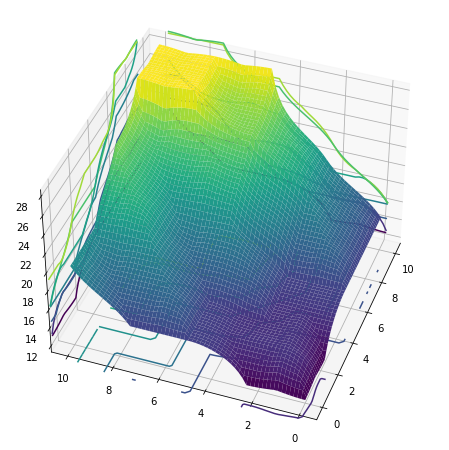

In [ ]:
from networkx.algorithms.bipartite import projection
from numpy.core.numeric import zeros_like
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


universe = np.linspace(0,10,61) #Chia đều ra gồm 61 phần tử
universe1 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'food')
service = ctrl.Antecedent(universe,'service')
tip = ctrl.Consequent(universe1,'tip')

# Vẽ Membership tự động
input_data = ['Very_Poor','Poor','Average','Good','Very_Good']
output_data = ['Very_Less','Less','Normal','Much','Very_Much']

food.automf(names = input_data)
service.automf(names = input_data)
tip.automf(names = output_data)

rule0 = ctrl.Rule(antecedent=((food['Very_Poor']&service['Very_Poor'])|(food['Very_Poor']&service['Poor'])
                              |(food['Poor']&service['Very_Poor'])|(food['Poor']&service['Poor']))
                              ,consequent=tip['Very_Less'],label = 'ruleVL')

rule1 = ctrl.Rule(antecedent=((food['Very_Poor']&service['Average'])|(food['Very_Poor']&service['Good'])
                              |(food['Poor']&service['Poor'])|(food['Poor']&service['Average'])
                              |(food['Average']&service['Very_Poor'])|(food['Average']&service['Poor'])
                              |(food['Good']&service['Very_Poor'])|(food['Very_Good']&service['Very_Poor']))
                              ,consequent=tip['Less'],label = 'ruleL')

rule2 = ctrl.Rule(antecedent=((food['Very_Poor']&service['Very_Good'])|(food['Poor']&service['Good'])
                              |(food['Poor']&service['Very_Good'])|(food['Average']&service['Average'])
                              |(food['Average']&service['Good'])|(food['Good']&service['Poor'])
                              |(food['Very_Good']&service['Poor']))
                              ,consequent=tip['Normal'],label = 'ruleN')

rule3 = ctrl.Rule(antecedent=((food['Average']&service['Very_Good'])|(food['Good']&service['Average']))
                              ,consequent=tip['Much'],label = 'ruleM')

rule4 = ctrl.Rule(antecedent=((food['Good']&service['Good'])|(food['Good']&service['Very_Good'])
                              |(food['Very_Good']&service['Average'])|(food['Very_Good']&service['Good'])
                              |(food['Very_Good']&service['Very_Good']))
                              ,consequent=tip['Very_Much'],label = 'ruleVM')


system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=61*61+1)

upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z = zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['food'] = x[i,j]
    sim.input['service'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
#Vẽ ra bề mặt điều khiển
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

#Vẽ 3 hình chiếu lên trên mặt phẳng bề mặt điều khiển
cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)

ax.view_init(40,200)

# Hiển Thị Kết Quả
#food.view()
#service.view()
#tip.view()


<ipython-input-35-74965ba23ce9>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
<ipython-input-35-74965ba23ce9>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
<ipython-input-35-74965ba23ce9>:79: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)


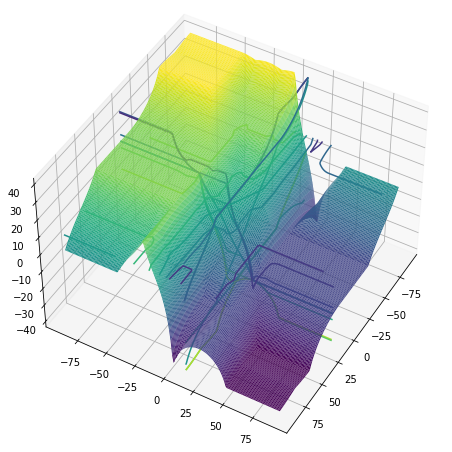

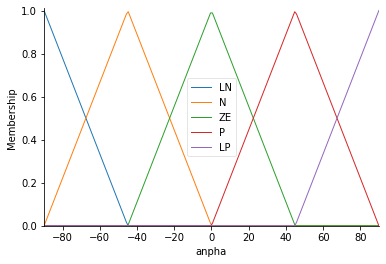

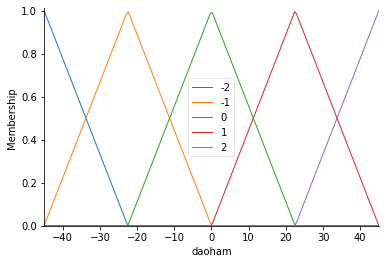

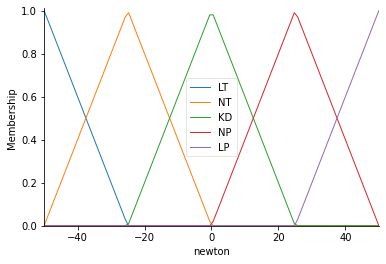

In [ ]:
# Con Lắc Ngược

from networkx.algorithms.bipartite import projection
from numpy.core.numeric import zeros_like
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

#Quy ước bên trái là - bên phải là +
data_anpha = np.linspace(-90,90,180) 
data_daoham = np.linspace(-45,45,180)
luc = np.linspace(-50,50,100)

anpha = ctrl.Antecedent(data_anpha,'anpha') 
daoham = ctrl.Antecedent(data_daoham,'daoham') 

newton = ctrl.Consequent(luc,'newton')

# Vẽ Membership tự động
input_data1 = ['LN','N','ZE','P','LP']
input_data2 = ['-2','-1','0','1','2']
output_data = ['LT','NT','KD','NP','LP']

anpha.automf(names = input_data1)
daoham.automf(names = input_data2)

newton.automf(names = output_data)

#Rule
rule0 = ctrl.Rule(antecedent=((anpha['LN']&daoham['-2'])|(anpha['N']&daoham['-2'])
                              |(anpha['LN']&daoham['-1'])|(anpha['LN']&daoham['0']))
                              ,consequent=newton['LP'],label = 'tacdonglucLonTuPhaiQua')

rule1 = ctrl.Rule(antecedent=((anpha['ZE']&daoham['-2'])|(anpha['P']&daoham['-2'])
                              |(anpha['N']&daoham['-1'])|(anpha['ZE']&daoham['-1'])
                              |(anpha['P']&daoham['-1'])|(anpha['LP']&daoham['-1'])
                              |(anpha['N']&daoham['0']))
                              ,consequent=newton['NP'],label = 'tacdonglucNhoTuPhaiQua')

rule2 = ctrl.Rule(antecedent=((anpha['P']&daoham['0'])|(anpha['N']&daoham['1'])
                              |(anpha['ZE']&daoham['1'])|(anpha['P']&daoham['1'])
                              |(anpha['LP']&daoham['1'])|(anpha['N']&daoham['2'])
                              |(anpha['ZE']&daoham['2']))
                              ,consequent=newton['NT'],label = 'tacdonglucNhoTuTraiQua')

rule3 = ctrl.Rule(antecedent=((anpha['LP']&daoham['-2'])|(anpha['ZE']&daoham['0'])|(anpha['LN']&daoham['2']))
                              ,consequent=newton['KD'],label = 'KhongTacDung')

rule4 = ctrl.Rule(antecedent=((anpha['LP']&daoham['0'])|(anpha['LN']&daoham['1'])
                              |(anpha['P']&daoham['2'])|(anpha['LP']&daoham['2']))
                              ,consequent=newton['LT'],label = 'tacdonglucLonTuTraiQua')

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=180180+1)

upsampled = np.linspace(-90,90,180)
x,y = np.meshgrid(upsampled,upsampled)
z = zeros_like(x)

for i in range(180):
  for j in range(180):
    sim.input['anpha'] = x[i,j]
    sim.input['daoham'] = y[i,j]
    sim.compute()
    z[i,j]=sim.output['newton']


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
#Vẽ ra bề mặt điều khiển
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

#Vẽ 3 hình chiếu lên trên mặt phẳng bề mặt điều khiển
cset = ax.contour(x,y,z,zdir='z',offset =9,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='x',offset =11,cmap='viridis',anpha=0.5)
cset = ax.contour(x,y,z,zdir='y',offset =11,cmap='viridis',anpha=0.5)

ax.view_init(45,30)

#Hiển Thị Kết Quả
anpha.view()
daoham.view()
newton.view()




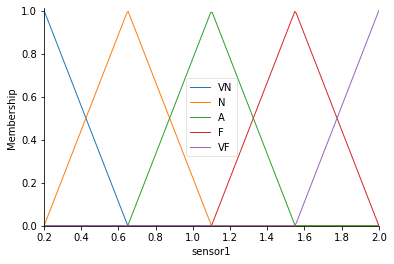

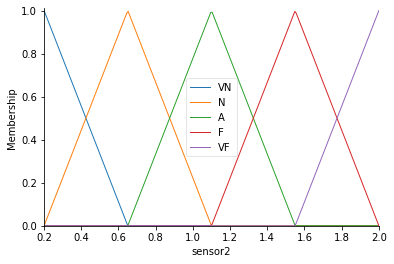

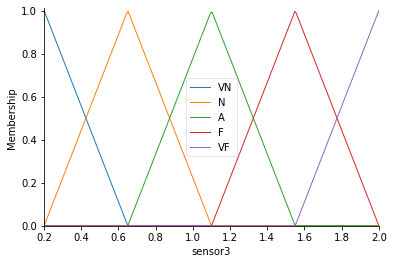

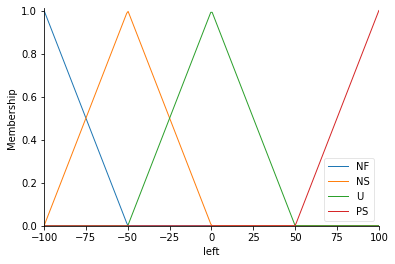

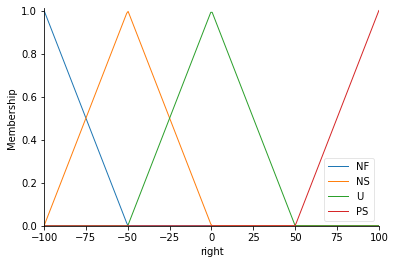

In [ ]:
# Robot Mobile có 2 bánh xe 

from networkx.algorithms.bipartite import projection
from numpy.core.numeric import zeros_like
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

data_sensor = np.linspace(0.2,2,240) #Chia đều ra gồm 61 phần tử 0.2 đến 2m là khoảng cách sensor phát thấy tín hiệu
data_velocity = np.linspace(-100,100,240) #Vận tốc từ -100 đến 100

sensor1 = ctrl.Antecedent(data_sensor,'sensor1') #Phía trước robot
sensor2 = ctrl.Antecedent(data_sensor,'sensor2') #Bên trái robot
sensor3 = ctrl.Antecedent(data_sensor,'sensor3') #Bên phải robot

left = ctrl.Consequent(data_velocity,'left')
right = ctrl.Consequent(data_velocity,'right')

# Vẽ Membership tự động
input_data = ['VN','N','A','F','VF'] #Very_Near - Near - Average - Far - Very Far
output_data = ['NF','NS','U','PS','PS'] #Negative_Fast - Negative_Slow - Unchanged - Positive_Slow - Positive_Fast

sensor1.automf(names = input_data)
sensor2.automf(names = input_data)
sensor3.automf(names = input_data)

left.automf(names = output_data)
right.automf(names = output_data)

#Xây dựng luật
rule0 = ctrl.Rule(antecedent=((sensor1['LN']&daoham['-2'])|(sensor1['N']&daoham['-2'])
                              |(sensor1['LN']&daoham['-1'])|(sensor1['LN']&daoham['0']))
                              ,consequent=newton['LP'],label = 'tacdonglucLonTuPhaiQua')


#Hiển Thị Kết Quả
sensor1.view()
sensor2.view()
sensor3.view()

left.view()
right.view()

#Rule

